In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [86]:
df=pd.read_csv("bmd_logistic_regression.csv")
df.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


In [87]:
df["medication"].unique()

array(['Anticonvulsant', 'No medication', 'Glucocorticoids'], dtype=object)

In [88]:
df["sex"].unique()

array(['F', 'M'], dtype=object)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            169 non-null    int64  
 1   age           169 non-null    float64
 2   sex           169 non-null    object 
 3   fracture      169 non-null    object 
 4   weight_kg     169 non-null    float64
 5   height_cm     169 non-null    float64
 6   medication    169 non-null    object 
 7   waiting_time  169 non-null    int64  
 8   bmd           169 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 12.0+ KB


In [90]:
df.drop(["id","waiting_time"],axis=1,inplace=True)

In [91]:
df.describe()


,age,weight_kg,height_cm,bmd
count,169.000000,169.000000,169.000000,169.000000
mean,63.631531,64.665680,160.254438,0.783104
std,12.356936,11.537171,7.928272,0.166529
min,35.814058,36.000000,142.000000,0.407600
25%,54.424211,56.000000,154.000000,0.670800
50%,63.487837,64.500000,160.500000,0.786100
75%,72.080558,73.000000,166.000000,0.888800
max,88.753795,96.000000,177.000000,1.362400


In [92]:
df['age'] = df['age'].astype('int')

<AxesSubplot:xlabel='weight_kg', ylabel='Count'>

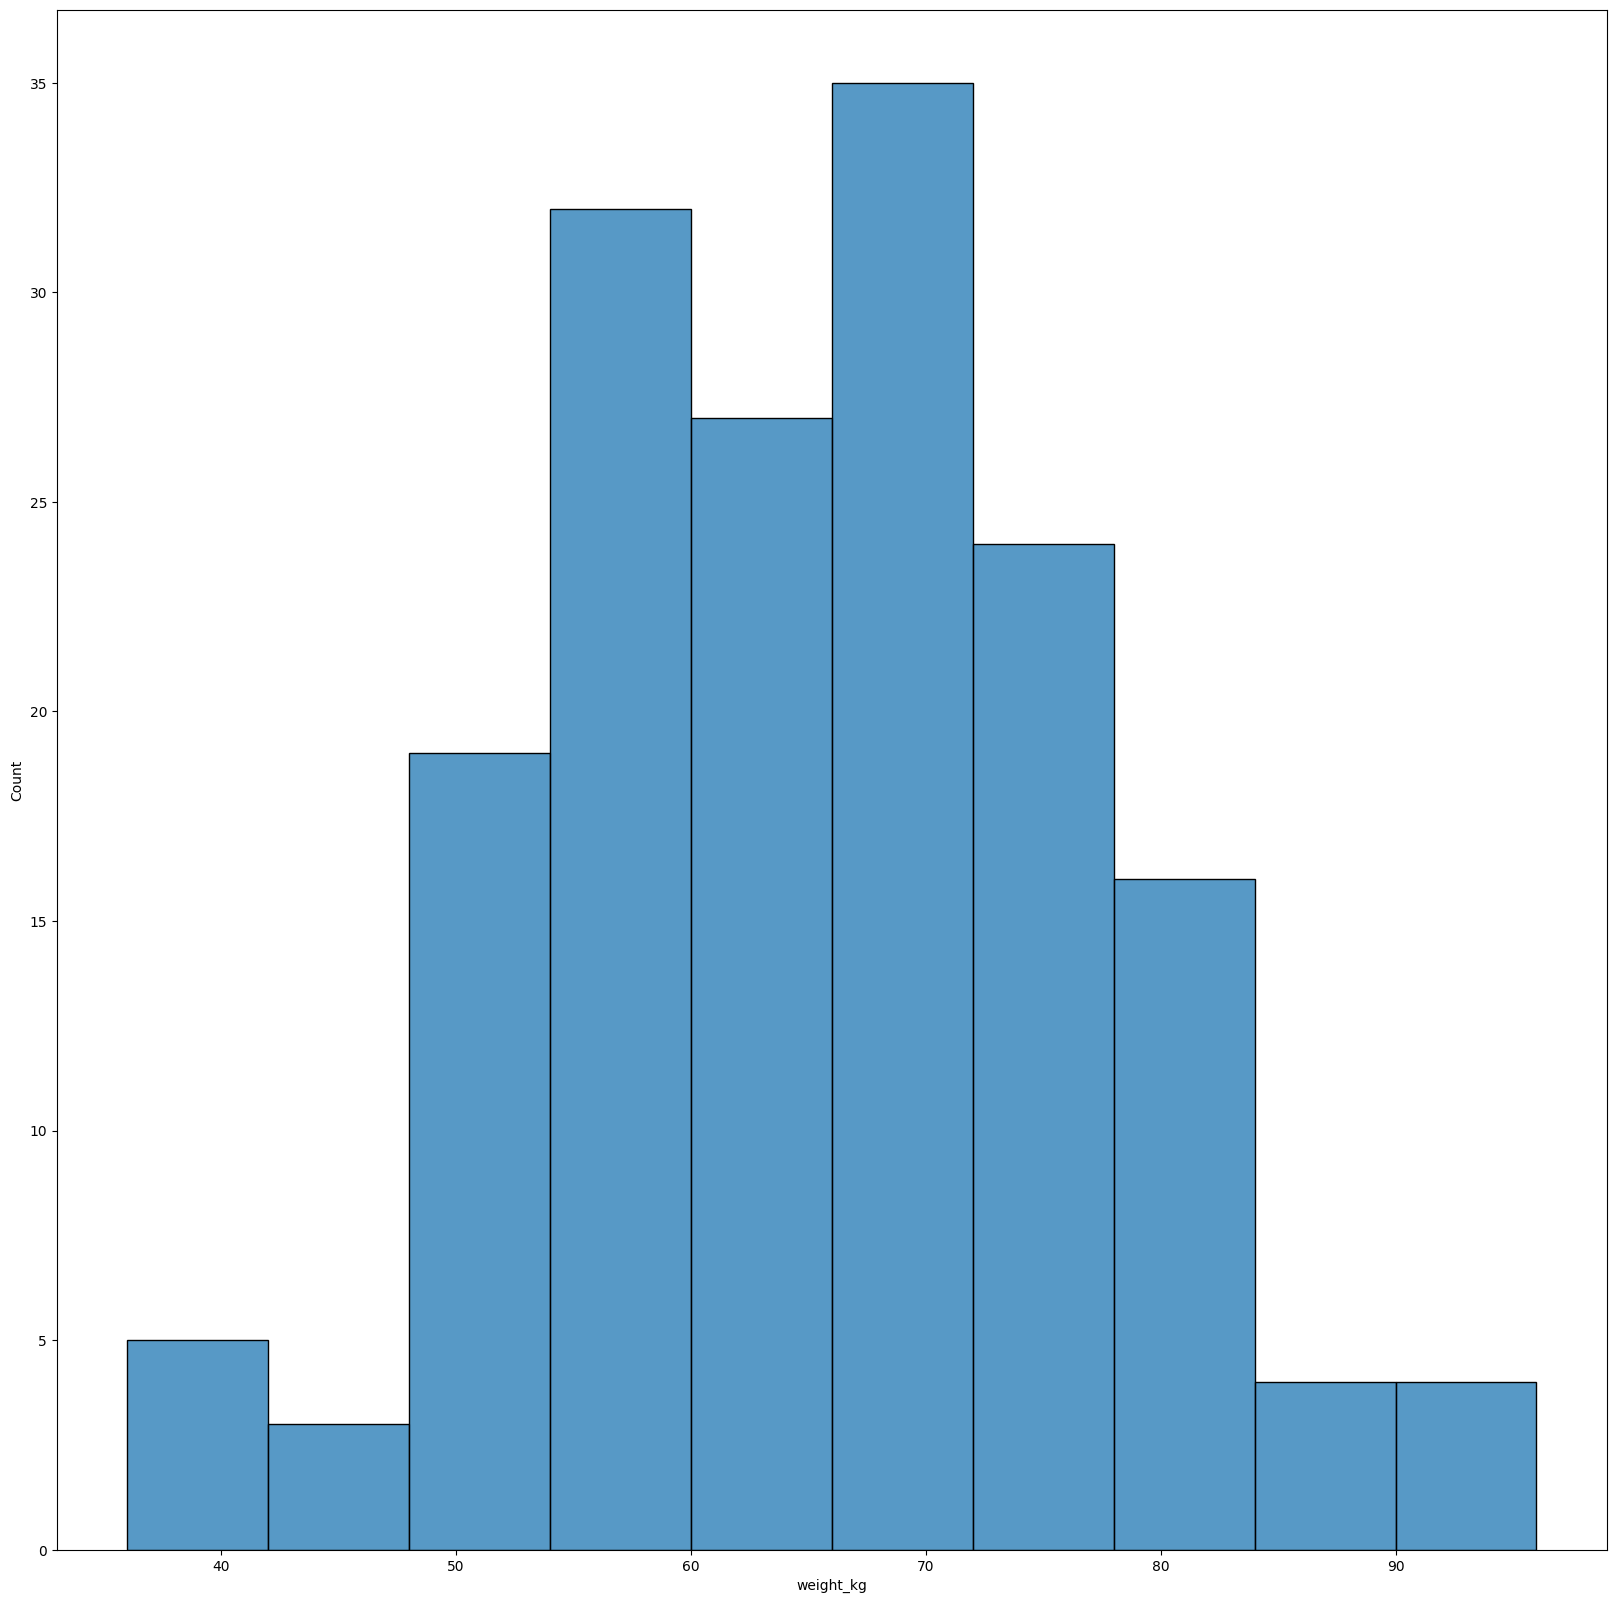

In [93]:
plt.figure(figsize=(20,20))
sns.histplot(df.weight_kg)

<AxesSubplot:xlabel='fracture', ylabel='count'>

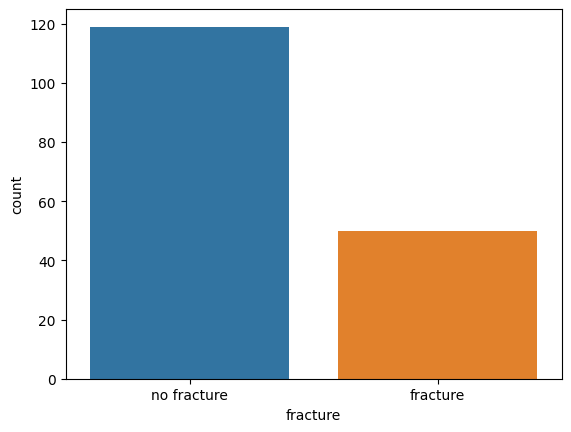

In [94]:
sns.countplot(df.fracture)

<AxesSubplot:xlabel='medication', ylabel='count'>

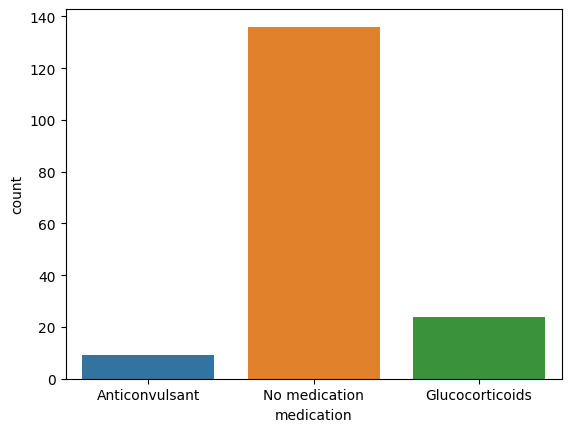

In [95]:
sns.countplot(df.medication)

In [96]:
n_cols=df.select_dtypes(include=['int','float']).columns
n_cols

Index(['age', 'weight_kg', 'height_cm', 'bmd'], dtype='object')

In [97]:
c_cols=df.select_dtypes(include=['object']).columns
c_cols

Index(['sex', 'fracture', 'medication'], dtype='object')

<AxesSubplot:xlabel='fracture', ylabel='count'>

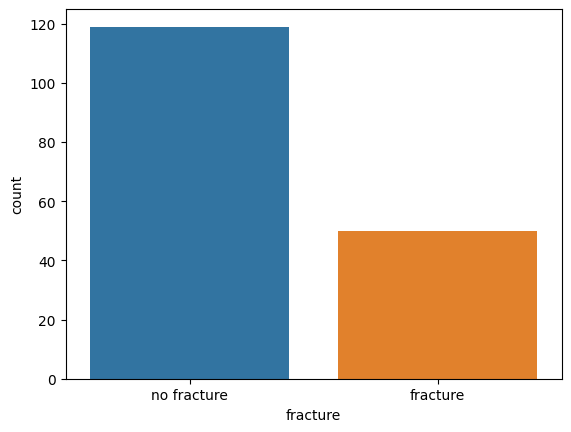

In [98]:
sns.countplot(df.fracture)

<AxesSubplot:xlabel='bmd'>

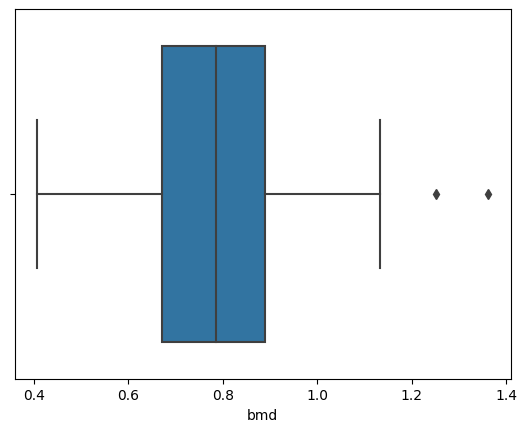

In [99]:
sns.boxplot(df.bmd)

<Figure size 2000x2000 with 0 Axes>

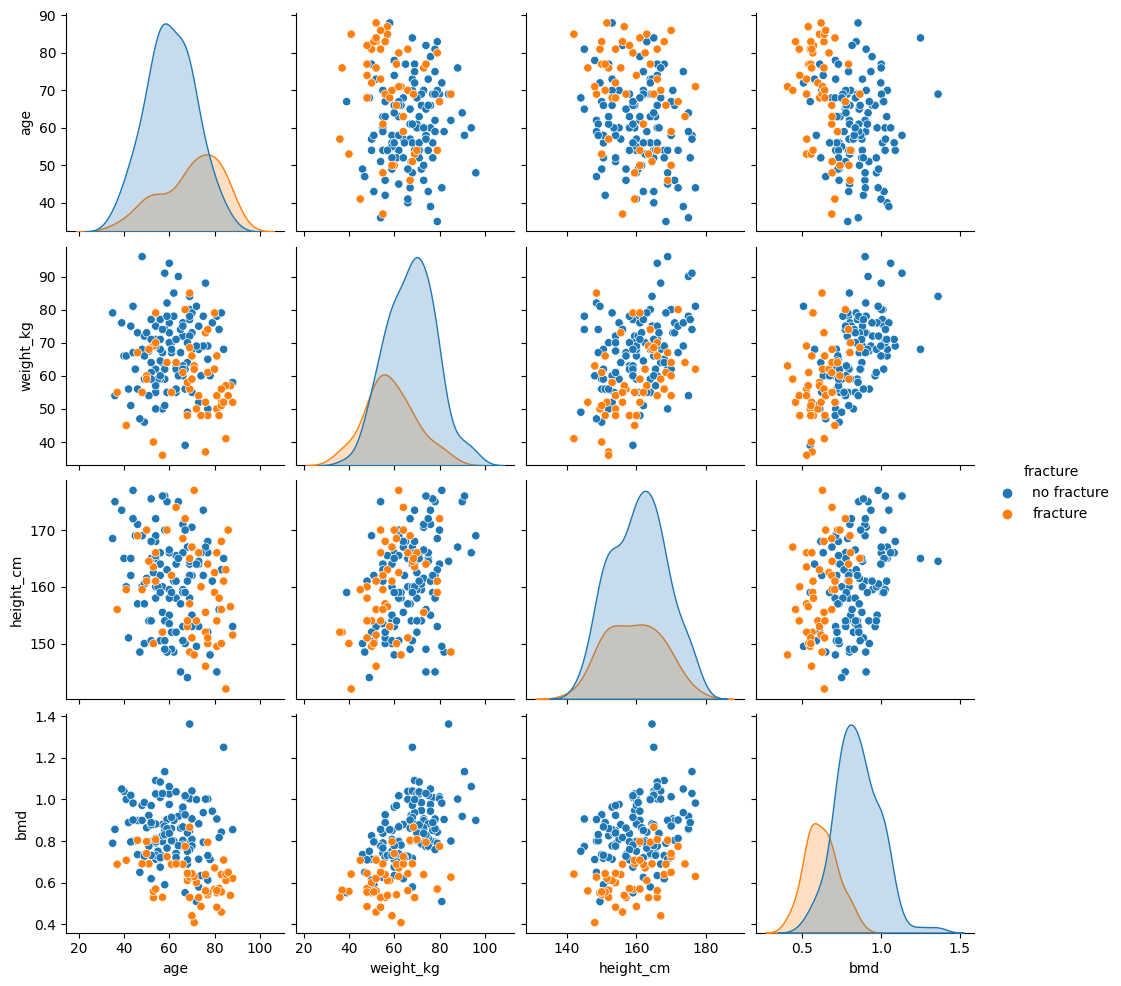

In [100]:
plt.figure(figsize=(20,20))
sns.pairplot(df,hue="fracture")

<AxesSubplot:>

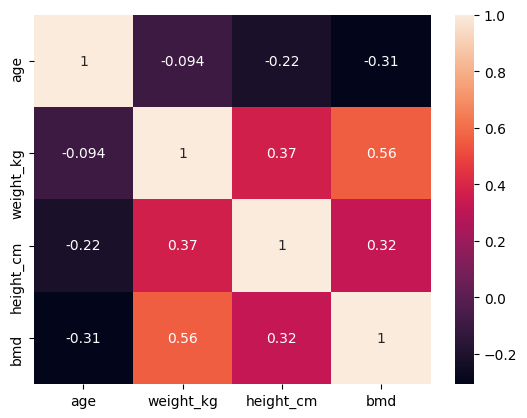

In [101]:
# p .;
sns.heatmap(df.corr(),annot=True)

In [102]:
df.head()

,age,sex,fracture,weight_kg,height_cm,medication,bmd
0,57,F,no fracture,64.0,155.5,Anticonvulsant,0.8793
1,75,F,no fracture,78.0,162.0,No medication,0.7946
2,70,M,no fracture,73.0,170.5,No medication,0.9067
3,78,F,no fracture,60.0,148.0,No medication,0.7112
4,54,M,no fracture,55.0,161.0,No medication,0.7909


In [103]:
X=df.drop("fracture",axis=1)
y=df["fracture"]  

In [104]:
X


,age,sex,weight_kg,height_cm,medication,bmd
0,57,F,64.0,155.5,Anticonvulsant,0.8793
1,75,F,78.0,162.0,No medication,0.7946
2,70,M,73.0,170.5,No medication,0.9067
3,78,F,60.0,148.0,No medication,0.7112
4,54,M,55.0,161.0,No medication,0.7909
...,...,...,...,...,...,...
164,77,M,74.0,164.0,No medication,0.7941
165,50,F,59.0,161.0,No medication,0.7971
166,46,M,67.0,169.0,No medication,0.8037
167,54,M,70.0,166.0,No medication,0.8072


In [105]:
y

0      no fracture
1      no fracture
2      no fracture
3      no fracture
4      no fracture
          ...     
164       fracture
165       fracture
166       fracture
167       fracture
168       fracture
Name: fracture, Length: 169, dtype: object

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [108]:
X_train.shape

(118, 6)

In [109]:
X_test.shape

(51, 6)

In [110]:
y_train.shape

(118,)

In [111]:
y_test.shape

(51,)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [119]:
cf=ColumnTransformer([("trf",OneHotEncoder(sparse=False,drop="first"),["sex","medication"])],remainder="passthrough")

In [120]:
pipe=Pipeline(steps=[("step1",cf),
                    ("step2",LogisticRegression(solver="liblinear"))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['sex', 'medication'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [121]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))